In [2]:
from sklearn import datasets
import numpy as np

In [3]:
iris=datasets.load_iris()
list(iris.keys())
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y=iris.target

In [5]:
print(f"Class labels: {np.unique(y)}")

Class labels: [0 1 2]


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
print(f"Labels counts in y: {np.bincount(y)}")
print(f"Labels counts in y_train: {np.bincount(y_train)}")
print(f"Labels counts in y_test: {np.bincount(y_test)}")

Labels counts in y: [50 50 50]
Labels counts in y_train: [40 40 40]
Labels counts in y_test: [10 10 10]


In [8]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

In [9]:
from sklearn.linear_model import Perceptron
ppn=Perceptron(max_iter=40, eta0=0.1, random_state=42)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, max_iter=40, random_state=42)

In [10]:
y_pred=ppn.predict(X_test_std)
print(f"Missclassified samples: {(y_test != y_pred).sum()}")

Missclassified samples: 3


In [11]:
from sklearn.metrics import accuracy_score
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.9


In [12]:
print(f"Accuracy: {ppn.score(X_test_std, y_test)}")

Accuracy: 0.9


In [13]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X,y,classifier,test_idx=None,resolution=0.02):
    #setup marker generator and color map
    markers=('s','x','o','^','v')
    colors=('red','blue','lightgreen','gray','cyan')
    cmap=ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision surface
    x1_min, x1_max=X[:,0].min()-1, X[:,0].max()+1
    x2_min, x2_max=X[:,1].min()-1, X[:,1].max()+1
    xx1, xx2=np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z=classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z=Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.3,cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    #plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0], y=X[y==cl,1], alpha=0.8, c=colors[idx], marker=markers[idx], label=f'Class:{cl}',edgecolor='black')

    #highlight test samples
    if test_idx:
        X_test, y_test=X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:,0], X_test[:,1], c='none', alpha=1.0, linewidth=1, marker='o', s=100, label='test set',edgecolor='black')

C:\Users\alfat\AppData\Local\Temp/ipykernel_5132/113769855.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl,0], y=X[y==cl,1], alpha=0.8, c=colors[idx], marker=markers[idx], label=f'Class:{cl}',edgecolor='black')


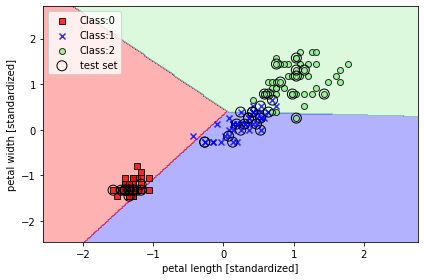

In [14]:
X_combined_std=np.vstack((X_train_std, X_test_std))
y_combined=np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

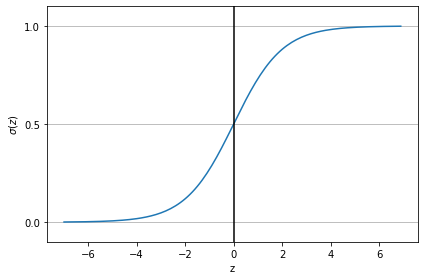

In [15]:
def sigmoid(Z):
    return 1.0/(1.0+np.exp(-Z))
z=np.arange(-7,7,0.1)
sigma_z=sigmoid(z)
plt.plot(z, sigma_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\sigma(z)$')
plt.yticks([0.0, 0.5, 1.0])
ax=plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

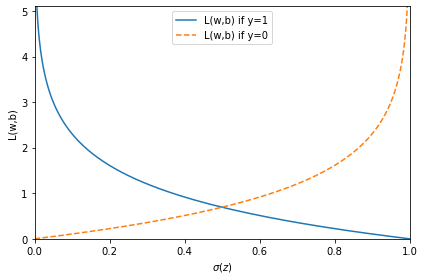

In [16]:
def loss_1(z):
    return -np.log(sigmoid(z))
def loss_0(z):
    return -np.log(1-sigmoid(z))
z=np.arange(-10,10,0.1)
sigma_z=sigmoid(z)
c1=[loss_1(x) for x in z]
plt.plot(sigma_z, c1, label='L(w,b) if y=1')
c0=[loss_0(x) for x in z]
plt.plot(sigma_z, c0, linestyle='--', label='L(w,b) if y=0')
plt.ylim(0.0, 5.1)
plt.xlim([0,1])
plt.xlabel('$\sigma(z)$')
plt.ylabel('L(w,b)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()